## Naïve Bayes (NB) in Python with Labeled Text Data

Naive Bayes classifier is a machine learning technique used in supervised learning. It is based on the Bayes Theorem which states that the probability of an event is based on prior knowledge of conditions that might be related to the event. Naive Bayes classifier works by calculating the probability of each attribute belonging to each class and then making a prediction based on the highest calculated probability. It assumes that the features in the data are independent of each other. It is a popular technique used in text classification, spam filtering, and medical diagnosis.

The multinomial Naive Bayes uses a multinomial distribution for each of the features and is used for discrete data classification. It's useful to classify text-based data based on the analysis of the content. 

In this project, I will use the twitter sentiment dataset to predict the sentiment of contents by separating the dataset into two sections: training and testing.

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

Code reference: 03-classification-and-regression by J. Hickman

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
df = pd.read_csv('../../data/api data/twitter sentiment.csv')
df = df.iloc[: , 1:]


In [66]:
df

,Topic,Content,neg,neu,pos,compound
0,mental health teenager,think need worry kpop stan hating teenager hiy...,0.383,0.617,0.000,-0.7351
1,mental health teenager,besides causing mental health problems teenage...,0.244,0.756,0.000,-0.6705
2,mental health teenager,ymcanz lipaliverpool let break little bit past...,0.128,0.482,0.390,0.8720
3,mental health teenager,good evening used listen teenager trust loyalt...,0.000,0.361,0.639,0.9423
4,mental health teenager,new survey shows australian teenagers less opt...,0.000,0.889,0.111,0.2516
...,...,...,...,...,...,...
145,lgbtq youth,ellee_bellee goldensateiiite noangel69420 will...,0.000,1.000,0.000,0.0000
146,lgbtq youth,queer media become mainstay less half lgbtq yo...,0.000,0.882,0.118,0.4215
147,lgbtq youth,x2y small charity based wolverhampton amp blac...,0.039,0.808,0.153,0.6249
148,lgbtq youth,right want free speech comes history slavery a...,0.121,0.606,0.273,0.4588


In [67]:
labels=[]
y1=[]
for label in df["Topic"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)
corpus=df["Content"].to_list()
y2=df['compound'].to_numpy()

#convert 'topic' to numeric data

index = 0 : label = mental health teenager
index = 1 : label = substance use gen z
index = 2 : label = lgbtq youth


In [68]:
vectorizer=CountVectorizer(min_df=0.001)   
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

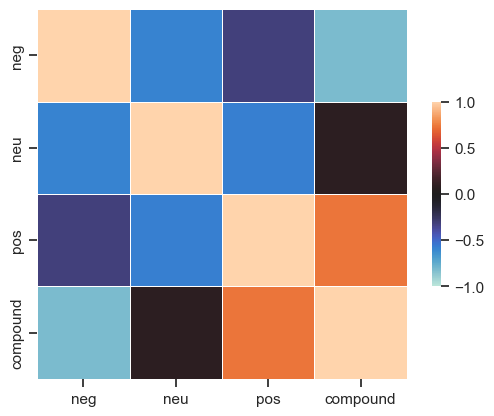

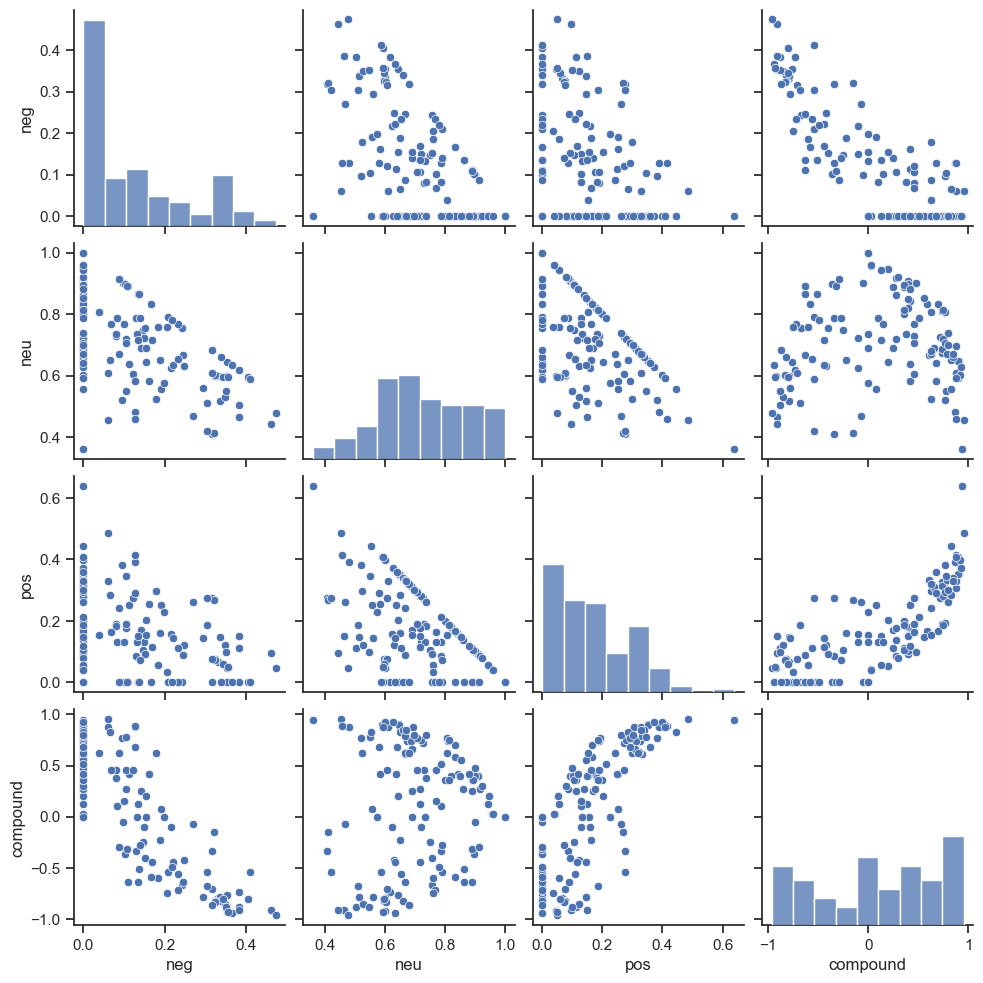

In [69]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.pairplot(df)

In [70]:
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (120, 1690)
y_train.shape		: (120,)
X_test.shape		: (30, 1690)
y_test.shape		: (30,)


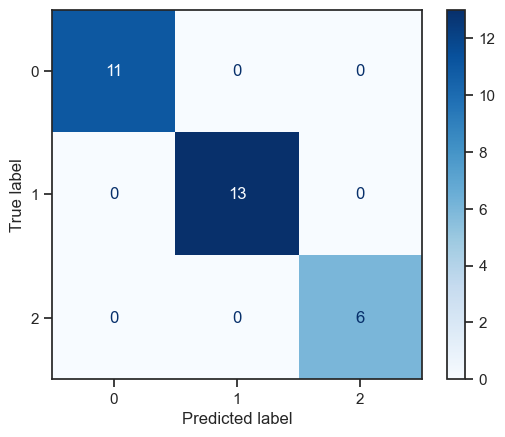

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
#The confusion Matrix suggests that the predicted labels are correct.

In [72]:
#Accuracy Function

def report(y,y_pred):
      print("Accuracy:",accuracy_score(y, y_pred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != y_pred).sum()))

def print_clf_summary():
      yp_train = clf.predict(x_train)
      yp_test = clf.predict(x_test)

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

In [73]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
print_clf_summary()


TRAINING SET:
Accuracy: 100.0
Number of mislabeled points out of a total 120 points = 0

TEST SET (UNTRAINED DATA):
Accuracy: 100.0
Number of mislabeled points out of a total 30 points = 0

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2]
[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2]
ERRORS: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

TEST SET (UNTRAINED DATA):
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0]
ERRORS: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


The output suggests that the model predicted labels correctly.